# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
#setting the criteria for the API call
url = "https://api.openweathermap.org/data/2.5/weather?q="
demo_url = url + "London" + "&appid=" + weather_api_key
#print(demo_url)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

print("Beginning Data Retrieval")
print("")
print("-----------------------------")

city_name = []
temp = []
feels_like = []
temp_min = []
temp_max = []
pressure = []
humidity = []
lat = []
lon = []
visibility = []
wind_speed = []
cloud_cover = []
date = []
country = []


for city in cities:
    try:
        query_url = url + city + "&units=imperial" + "&appid=" + weather_api_key
        
        response = requests.get(query_url).json()
        
        city_name.append(response['name'])
        
        temp.append(response['main']['temp'])
        
        feels_like.append(response['main']['feels_like'])
        
        temp_min.append(response['main']['temp_min'])
        
        temp_max.append(response['main']['temp_max'])
        
        pressure.append(response['main']['pressure'])
        
        humidity.append(response['main']['humidity'])
        
        lat.append(response['coord']['lat'])
        
        lon.append(response['coord']['lon'])
        
        visibility.append(response['visibility'])
        
        wind_speed.append(response['wind']['speed'])
        
        cloud_cover.append(response['clouds']['all'])
        
        date.append(response['dt'])
        
        country.append(response['sys']['country'])
        
        print(f'Processing Record {city}')
        
        time.sleep(1)
        
    except:
        
        print('City not found, moving on...')

Beginning Data Retrieval

-----------------------------
Processing Record bathsheba
Processing Record punta arenas
City not found, moving on...
Processing Record atuona
Processing Record bandarbeyla
Processing Record hilo
Processing Record butaritari
Processing Record lebu
Processing Record hithadhoo
Processing Record port shepstone
City not found, moving on...
Processing Record esperance
Processing Record jamestown
Processing Record touros
Processing Record longyearbyen
Processing Record avarua
Processing Record puerto ayora
Processing Record rikitea
Processing Record vaitape
Processing Record iqaluit
Processing Record barra patuca
City not found, moving on...
Processing Record moyale
Processing Record vaini
Processing Record saskylakh
Processing Record bredasdorp
Processing Record melivoia
Processing Record albany
Processing Record sakakah
Processing Record provideniya
Processing Record ushuaia
Processing Record tevriz
Processing Record pedernales
Processing Record dikson
Processing 

Processing Record adre
Processing Record hofn
Processing Record ekibastuz
Processing Record turukhansk
Processing Record brae
Processing Record maloy
Processing Record leningradskiy
Processing Record garowe
Processing Record vostok
Processing Record kirakira
Processing Record birao
Processing Record erzin
City not found, moving on...
Processing Record jumla
Processing Record bubaque
Processing Record cabatuan
Processing Record izhma
Processing Record bosaso
Processing Record tahta
Processing Record vila
Processing Record aberystwyth
Processing Record cherskiy
Processing Record norman wells
Processing Record changji
Processing Record lagoa
Processing Record matamoros
Processing Record egvekinot
Processing Record parfenyevo
Processing Record hambantota
City not found, moving on...
Processing Record hailey
Processing Record jalu
Processing Record tres arroyos
Processing Record severnyy
Processing Record belgrade
Processing Record novaya lyalya
Processing Record namibe
Processing Record ha

Processing Record shushenskoye
Processing Record sehithwa
Processing Record sergeyevka
Processing Record mountain home
Processing Record badou
Processing Record prainha
Processing Record xichang


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = {
    'City Name':city_name,
    'Lat':lat,
    'Lon':lon,
    'Max Temperature':temp_max,
    'Humidity':humidity,
    'Cloudiness':cloud_cover,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
}

city_df = pd.DataFrame(city_data)
city_df

,City Name,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,78.80,65,40,21.85,BB,1614397309
1,Punta Arenas,-53.1500,-70.9167,48.20,87,0,8.05,CL,1614397310
2,Atuona,-9.8000,-139.0333,79.86,80,81,14.29,PF,1614397311
3,Bandarbeyla,9.4942,50.8122,76.08,79,58,13.58,SO,1614397313
4,Hilo,19.7297,-155.0900,77.00,65,90,8.05,US,1614397071
...,...,...,...,...,...,...,...,...,...
545,Sergeevka,53.8800,67.4158,-17.27,94,27,7.09,KZ,1614398031
546,Mountain Home,43.1330,-115.6912,32.00,74,1,16.11,US,1614398032
547,Badou,7.5833,0.6000,73.38,90,82,2.10,TG,1614398034
548,Prainha,-1.8000,-53.4800,73.67,95,85,3.24,BR,1614398035


In [6]:
city_df.to_csv('city_data.csv')

In [7]:
city_df.describe()

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,22.272488,16.069648,50.102673,74.503636,47.387273,8.133309,1.614398e+09
std,32.197530,87.818273,31.189937,19.295681,40.633968,5.901106,2.211014e+02
min,-54.800000,-179.166700,-31.790000,8.000000,0.000000,0.250000,1.614397e+09
25%,-2.856050,-63.493125,35.010000,65.250000,1.000000,3.750000,1.614397e+09
50%,26.997900,22.177350,59.000000,79.000000,40.000000,6.910000,1.614398e+09
75%,49.158325,89.764375,75.390000,88.000000,90.000000,10.580000,1.614398e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,37.980000,1.614398e+09


In [8]:
#Reloading city data from CSV to make further edits easier
city_data_path = "city_data.csv"
city_df = pd.read_csv(city_data_path)
city_df.describe()

,Unnamed: 0,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,274.500000,22.272488,16.069648,50.102673,74.503636,47.387273,8.133309,1.614398e+09
std,158.915596,32.197530,87.818273,31.189937,19.295681,40.633968,5.901106,2.211014e+02
min,0.000000,-54.800000,-179.166700,-31.790000,8.000000,0.000000,0.250000,1.614397e+09
25%,137.250000,-2.856050,-63.493125,35.010000,65.250000,1.000000,3.750000,1.614397e+09
50%,274.500000,26.997900,22.177350,59.000000,79.000000,40.000000,6.910000,1.614398e+09
75%,411.750000,49.158325,89.764375,75.390000,88.000000,90.000000,10.580000,1.614398e+09
max,549.000000,78.218600,179.316700,98.600000,100.000000,100.000000,37.980000,1.614398e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_cleaned_df = city_df.loc[city_df['Humidity'] < 100]
city_cleaned_df

,Unnamed: 0,City Name,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Bathsheba,13.2167,-59.5167,78.80,65,40,21.85,BB,1614397309
1,1,Punta Arenas,-53.1500,-70.9167,48.20,87,0,8.05,CL,1614397310
2,2,Atuona,-9.8000,-139.0333,79.86,80,81,14.29,PF,1614397311
3,3,Bandarbeyla,9.4942,50.8122,76.08,79,58,13.58,SO,1614397313
4,4,Hilo,19.7297,-155.0900,77.00,65,90,8.05,US,1614397071
...,...,...,...,...,...,...,...,...,...,...
545,545,Sergeevka,53.8800,67.4158,-17.27,94,27,7.09,KZ,1614398031
546,546,Mountain Home,43.1330,-115.6912,32.00,74,1,16.11,US,1614398032
547,547,Badou,7.5833,0.6000,73.38,90,82,2.10,TG,1614398034
548,548,Prainha,-1.8000,-53.4800,73.67,95,85,3.24,BR,1614398035


In [10]:
city_cleaned_df.describe()

,Unnamed: 0,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,273.730337,21.858747,16.500976,50.117603,73.739700,47.305243,8.215019,1.614398e+09
std,158.882963,32.337209,88.717754,31.567278,19.063084,40.624562,5.947049,2.217346e+02
min,0.000000,-54.800000,-179.166700,-31.790000,8.000000,0.000000,0.250000,1.614397e+09
25%,135.250000,-2.922775,-64.241400,33.820000,65.000000,1.000000,3.780000,1.614397e+09
50%,273.000000,26.433600,23.475000,59.350000,79.000000,40.000000,6.910000,1.614398e+09
75%,409.750000,48.750025,92.546400,75.735000,88.000000,90.000000,10.650000,1.614398e+09
max,549.000000,78.218600,179.316700,98.600000,99.000000,100.000000,37.980000,1.614398e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.
#Uneeded step

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#This was done above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

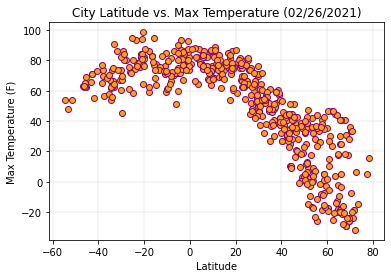

In [41]:
city_lat = city_cleaned_df['Lat']
city_max_temp = city_cleaned_df['Max Temperature']

plt.scatter(city_lat,city_max_temp, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Max Temperature (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('lat_vs_temperature.png')

## Latitude vs. Humidity Plot

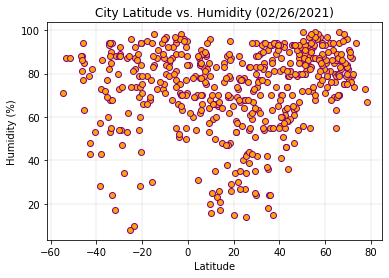

In [40]:
city_lat = city_cleaned_df['Lat']
city_max_humidity = city_cleaned_df['Humidity']

plt.scatter(city_lat,city_max_humidity, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Humidity (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

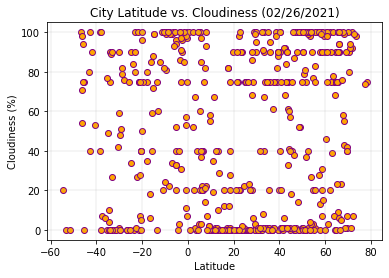

In [39]:
city_lat = city_cleaned_df['Lat']
city_max_cloudiness = city_cleaned_df['Cloudiness']

plt.scatter(city_lat,city_max_cloudiness, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Cloudiness (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

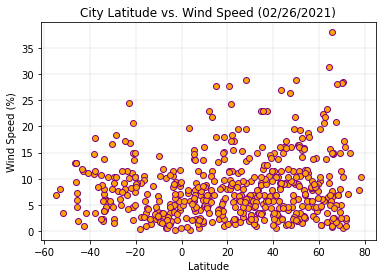

In [42]:
city_lat = city_cleaned_df['Lat']
city_max_windspeed = city_cleaned_df['Wind Speed']

plt.scatter(city_lat,city_max_windspeed, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Wind Speed (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('lat_vs_wind.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.7562116246300483


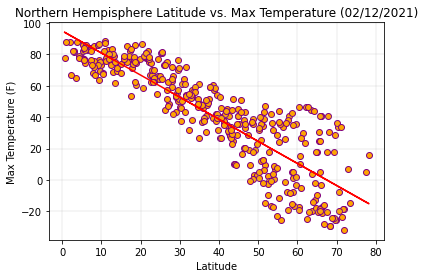

In [43]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

city_northern_lat = northern_hemisphere_df['Lat']
city_northern_max_temp = northern_hemisphere_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(city_northern_lat, city_northern_max_temp)
correlation = st.pearsonr(city_northern_lat,city_northern_max_temp)

print(f'The R Value is {rvalue**2}')

plt.scatter(city_northern_lat,city_northern_max_temp, facecolors='orange', edgecolors='purple')
plt.title('Northern Hempisphere Latitude vs. Max Temperature (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
regress_values = city_northern_lat * slope + intercept
plt.plot(city_northern_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Northern Hempisphere Latitude vs. Max Temperature.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.21139703122505707


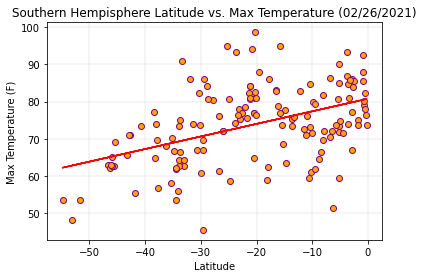

In [44]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

city_southern_lat = southern_hemisphere_df['Lat']
city_southern_max_temp = southern_hemisphere_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(city_southern_lat, city_southern_max_temp)
correlation = st.pearsonr(city_southern_lat,city_southern_max_temp)

print(f'The R Value is {rvalue**2}')

plt.scatter(city_southern_lat,city_southern_max_temp, facecolors='orange', edgecolors='purple')
plt.title('Southern Hempisphere Latitude vs. Max Temperature (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
regress_values = city_southern_lat * slope + intercept
plt.plot(city_southern_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Southern Hempisphere Latitude vs. Max Temperature.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.020744929009366024


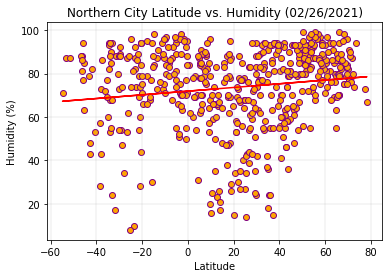

In [45]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

northern_city_lat = city_cleaned_df['Lat']
northern_city_max_humidity = city_cleaned_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_city_lat, northern_city_max_humidity)
correlation = st.pearsonr(northern_city_lat,northern_city_max_humidity)

print(f'The R Value is {rvalue**2}')

plt.scatter(northern_city_lat,northern_city_max_humidity, facecolors='orange', edgecolors='purple')
plt.title('Northern City Latitude vs. Humidity (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
regress_values = northern_city_lat * slope + intercept
plt.plot(northern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Northern City Latitude vs. Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.024312874630044445


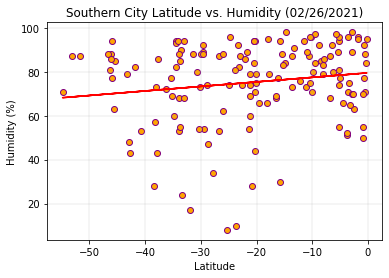

In [46]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

southern_city_lat = southern_hemisphere_df['Lat']
southern_city_max_humidity = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_city_lat, southern_city_max_humidity)
correlation = st.pearsonr(city_southern_lat,city_southern_max_temp)

print(f'The R Value is {rvalue**2}')

plt.scatter(southern_city_lat,southern_city_max_humidity, facecolors='orange', edgecolors='purple')
plt.title('Southern City Latitude vs. Humidity (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
regress_values = southern_city_lat * slope + intercept
plt.plot(southern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Southern City Latitude vs. Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.09774738860893081


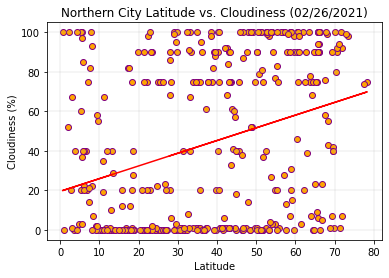

In [47]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

northern_city_lat = northern_hemisphere_df['Lat']
northern_city_max_cloudiness = northern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_city_lat, northern_city_max_cloudiness)
correlation = st.pearsonr(northern_city_lat,northern_city_max_cloudiness)

print(f'The R Value is {rvalue**2}')

plt.scatter(northern_city_lat,northern_city_max_cloudiness, facecolors='orange', edgecolors='purple')
plt.title('Northern City Latitude vs. Cloudiness (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
regress_values = northern_city_lat * slope + intercept
plt.plot(northern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Northern City Latitude vs. Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.06796215864459726


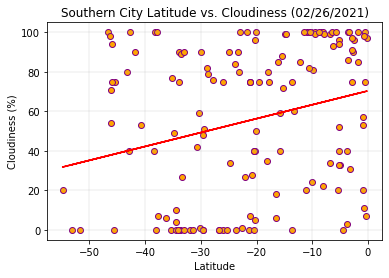

In [48]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

southern_city_lat = southern_hemisphere_df['Lat']
southern_city_max_cloudiness = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_city_lat, southern_city_max_cloudiness)
correlation = st.pearsonr(southern_city_lat,southern_city_max_cloudiness)

print(f'The R Value is {rvalue**2}')

plt.scatter(southern_city_lat,southern_city_max_cloudiness, facecolors='orange', edgecolors='purple')
plt.title('Southern City Latitude vs. Cloudiness (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
regress_values = southern_city_lat * slope + intercept
plt.plot(southern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Southern City Latitude vs. Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.014032729693169413


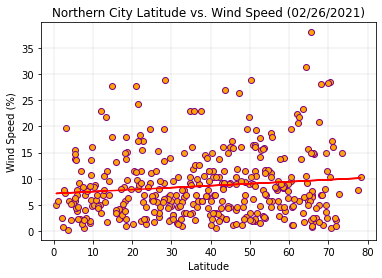

In [49]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

northern_city_lat = northern_hemisphere_df['Lat']
northern_city_max_windspeed = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_city_lat, northern_city_max_windspeed)
correlation = st.pearsonr(northern_city_lat,northern_city_max_windspeed)

print(f'The R Value is {rvalue**2}')

plt.scatter(northern_city_lat,northern_city_max_windspeed, facecolors='orange', edgecolors='purple')
plt.title('Northern City Latitude vs. Wind Speed (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
regress_values = northern_city_lat * slope + intercept
plt.plot(northern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Northern City Latitude vs. Wind Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.04973628328611973


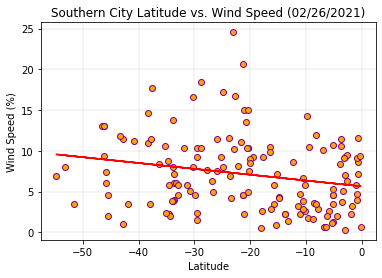

In [50]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

southern_city_lat = southern_hemisphere_df['Lat']
southern_city_max_windspeed = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_city_lat, southern_city_max_windspeed)
correlation = st.pearsonr(southern_city_lat,southern_city_max_windspeed)

print(f'The R Value is {rvalue**2}')

plt.scatter(southern_city_lat,southern_city_max_windspeed, facecolors='orange', edgecolors='purple')
plt.title('Southern City Latitude vs. Wind Speed (02/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
regress_values = southern_city_lat * slope + intercept
plt.plot(southern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
#plt.show()
plt.savefig('Southern City Latitude vs. Wind Speed.png')